# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
foundcity =[]
clouds = []
country = []
date =[]
humi =[]
lat =[]
lng =[]
temp = []
wind = []

query_url = url + "appid=" + api_key  + "&units=imperial" + "&q="

for city in cities:
    #try to find weather data for city
    try:
        response = requests.get(query_url + city).json()
        foundcity.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humi.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        city = city.replace("%20", " ")
        print(f"Found data {city.title()}.")
    except:
        print("No Data")
    continue 
print("-------------------------------------------------------")

No Data
Found data Bluff.
Found data Esperance.
Found data Sambava.
Found data La Ronge.
Found data Sumbe.
Found data Yellowknife.
Found data Port Alfred.
Found data Atuona.
Found data Avarua.
Found data San Patricio.
Found data Tuktoyaktuk.
Found data Saskylakh.
Found data Blythe.
Found data Saint Anthony.
Found data Eirunepe.
Found data Ribeira Grande.
Found data Envira.
Found data Tuensang.
Found data Batken.
Found data Ushuaia.
Found data Gevgelija.
Found data Saint-Philippe.
Found data Carnarvon.
Found data Mareeba.
No Data
Found data Cape Town.
Found data Rikitea.
Found data Longyearbyen.
Found data Vila Verde.
Found data Bredasdorp.
Found data Ostrovnoy.
Found data Qaanaaq.
Found data Port Elizabeth.
Found data Lebedyn.
Found data Westport.
Found data Jamestown.
Found data Hobart.
Found data Mar Del Plata.
Found data Bairnsdale.
Found data Komsomolskiy.
Found data Albany.
Found data Padang.
Found data Plouzane.
No Data
Found data Bengkulu.
Found data Upernavik.
Found data Vaini.

Found data Mitu.
Found data Nanortalik.
Found data Villa Carlos Paz.
Found data Bandar-E Lengeh.
Found data Santa Maria.
Found data Palo Alto.
Found data Bud.
Found data Miri.
Found data Bac Lieu.
Found data Anloga.
Found data Beaumont.
Found data Bilma.
Found data Berlevag.
Found data Douglas.
No Data
Found data Tinskoy.
Found data Camocim.
Found data Lisala.
No Data
Found data Grindavik.
Found data Tanout.
Found data Meulaboh.
Found data Mahebourg.
Found data Patan.
Found data Le Vauclin.
Found data Saint George.
Found data Bereda.
Found data Caborca.
Found data Saint-Augustin.
Found data Oksfjord.
Found data Rantepao.
No Data
Found data Dzaoudzi.
Found data Tongren.
Found data Traverse City.
Found data Chivay.
Found data Barguzin.
Found data San Juan.
Found data Laguna.
No Data
Found data Lithakia.
Found data Furano.
Found data Emba.
Found data Alexandria.
Found data Guerrero Negro.
Found data Ceres.
Found data Springbok.
Found data Ola.
Found data Aguada De Pasajeros.
Found data Ou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": foundcity,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humi,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": temp,
    "Wind Speed": wind
}


weather_data = pd.DataFrame(weather_dict)
weather_data.head(20)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Bluff,100,NZ,1586901773,94,-46.60,168.33,44.01,4.00
1,Esperance,90,AU,1586901773,93,-33.87,121.90,62.60,6.93
2,Sambava,86,MG,1586901773,84,-14.27,50.17,75.45,7.38
3,La Ronge,20,CA,1586901773,39,55.10,-105.28,30.20,10.29
4,Sumbe,9,AO,1586901773,86,-11.21,13.84,77.56,3.49
5,Yellowknife,90,CA,1586901687,79,62.46,-114.35,30.00,3.36
6,Port Alfred,85,ZA,1586901773,96,-33.59,26.89,62.01,4.00
7,Atuona,35,PF,1586901773,68,-9.80,-139.03,82.35,6.22
8,Avarua,68,CK,1586901727,61,-21.21,-159.78,80.60,6.93
9,San Patricio,5,MX,1586901773,73,19.22,-104.70,77.00,11.41


In [5]:
weather_data.to_csv("CityWeather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

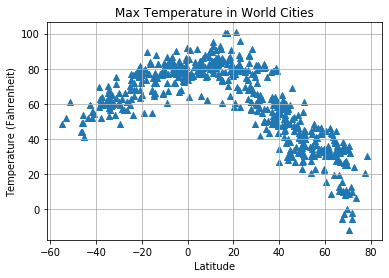

In [19]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="^")

plt.title("Max Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/MaxTempInWorld.png")

plt.show()

#### Latitude vs. Humidity Plot

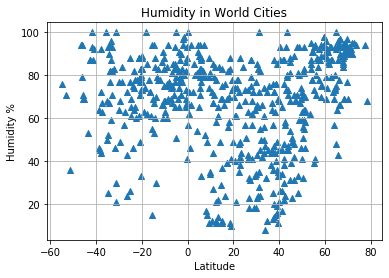

In [20]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="^")

plt.title("Humidity in World Cities")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/HumidityInWorld.png")

plt.show()

#### Latitude vs. Cloudiness Plot

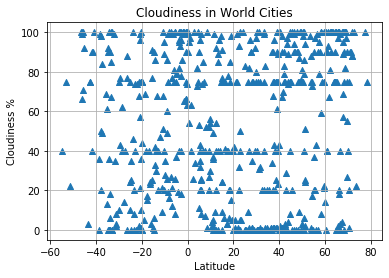

In [21]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="^")

plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CloudinessInWorld.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

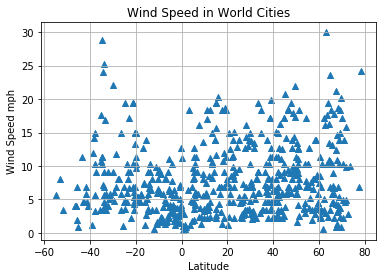

In [22]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="^")

plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/WindSpeedInWorld.png")

plt.show()